In [12]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SwapGate, CXGate
from qiskit.quantum_info import random_unitary
from weylchamber import c1c2c3, g1g2g3
import matplotlib.pyplot as plt
from monodromy.haar import gate_to_haar
from qiskit.extensions import UnitaryGate

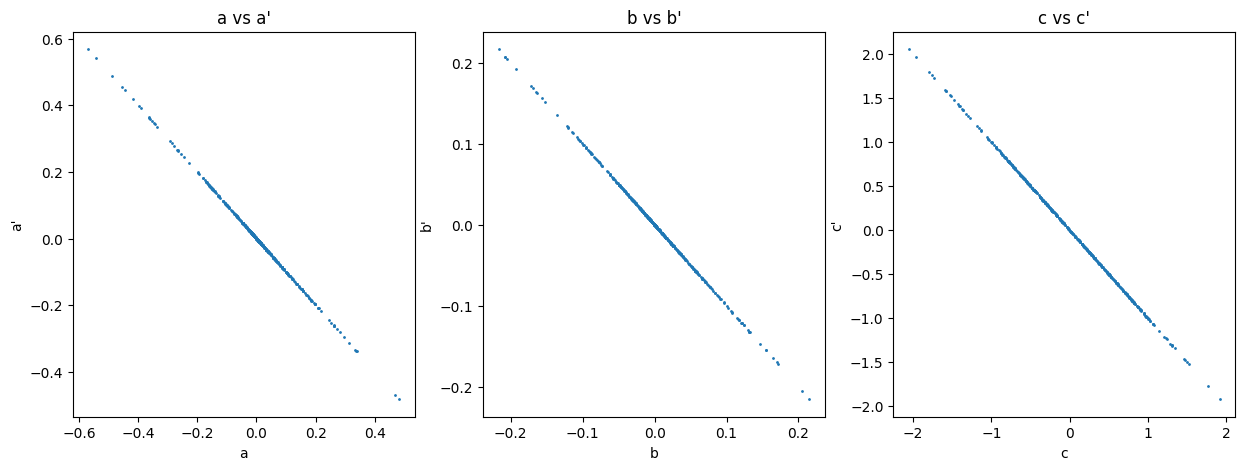

In [13]:
N = 500
# generate (a,b,c) ->swap-> (a',b',c') pairs
a_pairs, b_pairs, c_pairs = [], [], []
for _ in range(N):
    U = random_unitary(4).data
    U_prime = SwapGate().to_matrix() @ U
    abc = g1g2g3(U)
    abc_prime = g1g2g3(U_prime)
    a_pairs.append((abc[0], abc_prime[0]))
    b_pairs.append((abc[1], abc_prime[1]))
    c_pairs.append((abc[2], abc_prime[2]))
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (pairs, label) in enumerate(zip([a_pairs, b_pairs, c_pairs], ["a", "b", "c"])):
    axes[i].scatter(*zip(*pairs), s=1)
    axes[i].set_xlabel(f"{label}")
    axes[i].set_ylabel(f"{label}'")
    axes[i].set_title(f"{label} vs {label}'")
plt.show()

In [14]:
from qiskit.circuit.library import iSwapGate, XXPlusYYGate, CXGate
import numpy as np
from slam.utils.gates.custom_gates import FSim, BerkeleyGate

# U = FSim(np.pi/2, np.pi/6)
# U = iSwapGate().power(1/16)
U = CXGate().power(1 / 4)

6.500137765307217


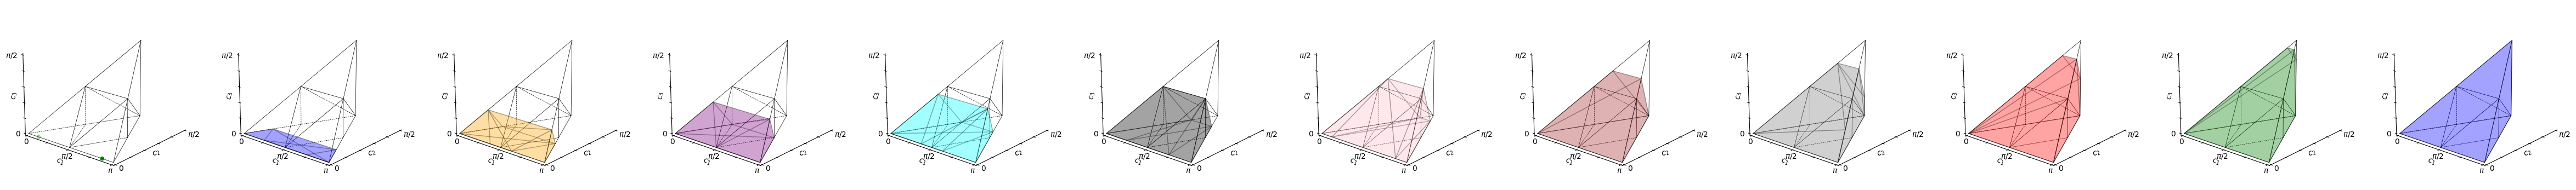

In [15]:
from monodromy.render import gate_to_coverage_plot

print(gate_to_haar(U))
gate_to_coverage_plot(U, overlap=False)

5.530331580596274


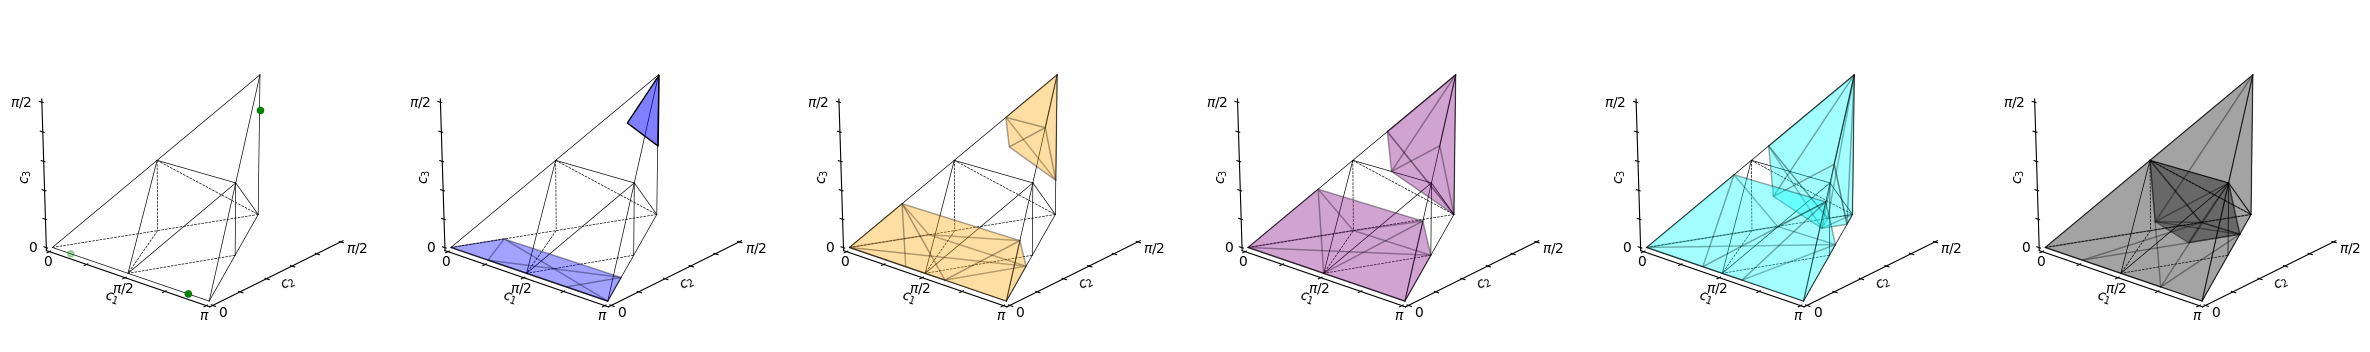

In [16]:
from monodromy.haar import expected_cost, gate_to_coverage
from monodromy.render import _plot_coverage_set

coverage = gate_to_coverage(U, SwapGate())
print(expected_cost(coverage))
_plot_coverage_set(coverage, overlap=False)